In [1]:
# https://thebook.io/080228/part05/ch20/

In [2]:
# 학습시킬 이미지 데이터가 너무 적음
# 특성을 찾는 비지도 학습을 사용할 것

In [3]:
# 이미지가 부족할때, imagedatagenerator 사용

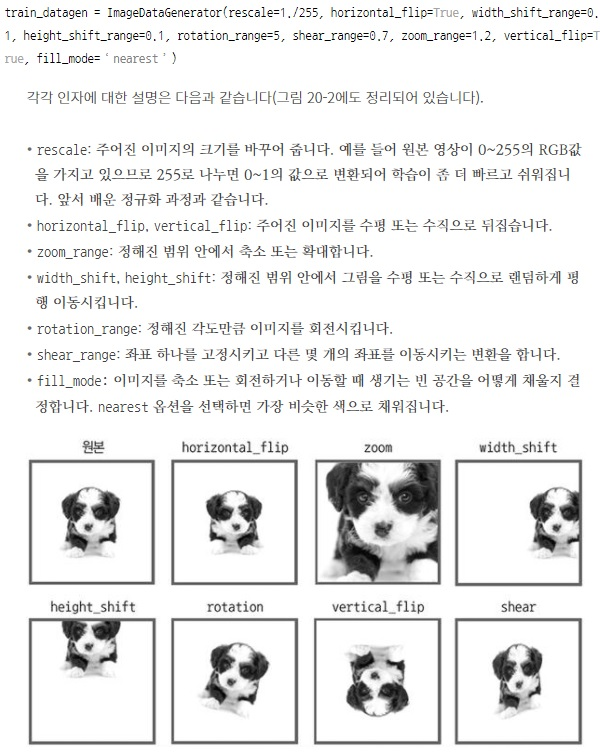

In [4]:
# 좌우를 뒤집으면 문제가 생김
# 위아래도 마찬가지.

# -> 학습할때 문제가 없는 이미지를 골라서 사용해야 함

In [5]:
# 책에 있는건 옛날 소스라, 그대로 치면 에러 남

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers

In [7]:
# image generator 사용
b_size = 5
train_datagen = ImageDataGenerator(rescale=1./255,
       horizontal_flip=True,      # 수평 대칭 이미지를 50% 확률로 만들어 추가
       width_shift_range=0.1,     # 전체 크기의 10% 범위에서 좌우로(random하게) 이동
       height_shift_range=0.1,    # 마찬가지로 위아래로(랜덤하게) 이동
                                  # rotation_range=5,  -> MRI사진을 회전시킨 이미지는 사용하지 않음
                                  # shear_range=0.7,  ->  MRI 를 한쪽으로 끄는 이미지도 안쓰고
                                  # zoom_range=[0.9, 2.2],   ->  MRI 사진 해상도는 정해져있어서 안씀
                                  # vertical_flip=True,
       fill_mode='nearest')


#train_generator = train_datagen.flow_from_directory(
train_generator = train_datagen.flow_from_directory(
    #'./train',                 # 학습셋이 있는 폴더 위치
    'data/치매MRI/train',
    target_size=(150, 150),
    #batch_size=5,
    batch_size=b_size,
    class_mode='binary')
# 폴더째로 타깃을 잡음(자동으로)

Found 160 images belonging to 2 classes.


In [8]:
# 테스트셋은 이미지 부풀리기 과정을 진행하지 않음
test_datagen = ImageDataGenerator(rescale=1./255)
 
#test_generator = test_datagen.flow_from_directory(
test_generator = test_datagen.flow_from_directory(
       #'./test',                   # 테스트셋이 있는 폴더 위치
    'data/치매MRI/test',
    target_size=(150, 150),
    batch_size=b_size,
    class_mode='binary')

Found 120 images belonging to 2 classes.


In [9]:
# 앞서 배운 CNN 모델을 만들어 적용하기
model = Sequential()             
model.add(Conv2D(32, (3, 3), input_shape=(150,150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))

# 모델 컴파일  
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=0.0002), 
              metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        1

In [11]:
# 지금부터가 책에 있는 소스랑 다름

steps_train = len(train_generator)
steps_test = len(test_generator)

In [12]:
print(steps_train, steps_test)
# >>> 32 24
# 이 숫자가 뭘까

# steps_train은
# 32번을 해야함

# 마찬가지로 steps_test은
# 24번을 해야함.

# -> 옛날에는 숫자가 넘어가도 됐지만,
# 이제는 숫자 넘어가면 안맞는다고 에러남.  -> 그래서 숫자 맞춰줘야함

32 24


In [13]:
# 모델 실행
#history = model.fit_generator(       .train_generator, steps_per_epoch=100, epochs=20, alidation_data=test_generator, validation_steps=4)
# 옛날에는 steps_per_epoch=100로 대충 써줘도 됐지만, 지금은 전체 데이터 갯수를 넘지를 못함 -> 그래서 반드시 맞춰줘야함
# -> 그래서 위에서 미리 숫자 뽑아준것임
hist = model.fit(train_generator, steps_per_epoch=steps_train,
                epochs=20, validation_data=test_generator, 
                 # validation_steps=4)
                 validation_steps=steps_test)
# steps_per_epoch -> 한 epoch당 몇번을 가야하나

Epoch 1/20
32/32 [==============================] - 5s 53ms/step - loss: 0.6929 - accuracy: 0.5375 - val_loss: 0.6792 - val_accuracy: 0.5083
Epoch 2/20
32/32 [==============================] - 1s 33ms/step - loss: 0.6847 - accuracy: 0.5125 - val_loss: 0.6669 - val_accuracy: 0.5333
Epoch 3/20
32/32 [==============================] - 1s 33ms/step - loss: 0.6784 - accuracy: 0.6000 - val_loss: 0.6396 - val_accuracy: 0.6417
Epoch 4/20
32/32 [==============================] - 1s 34ms/step - loss: 0.6428 - accuracy: 0.6750 - val_loss: 0.5936 - val_accuracy: 0.7000
Epoch 5/20
32/32 [==============================] - 1s 33ms/step - loss: 0.6075 - accuracy: 0.6375 - val_loss: 0.5644 - val_accuracy: 0.7000
Epoch 6/20
32/32 [==============================] - 1s 33ms/step - loss: 0.5808 - accuracy: 0.7188 - val_loss: 0.5177 - val_accuracy: 0.7917
Epoch 7/20
32/32 [==============================] - 1s 33ms/step - loss: 0.5125 - accuracy: 0.7625 - val_loss: 0.4036 - val_accuracy: 0.8583
Epoch 8/20
32

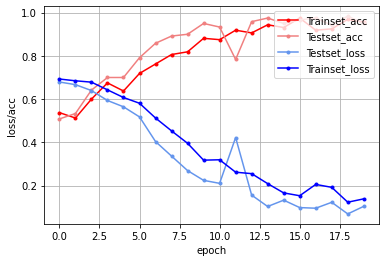

In [15]:
# 결과를 그래프로 표현하는 부분
#acc= history.history['accuracy']
#val_acc= history.history['val_accuracy']
#y_vloss = history.history['val_loss']
#y_loss = history.history['loss']
acc= hist.history['accuracy']
val_acc= hist.history['val_accuracy']
y_vloss = hist.history['val_loss']
y_loss = hist.history['loss']

x_len = np.arange(len(y_loss))  
plt.plot(x_len, acc, marker='.', c="red", label='Trainset_acc')
plt.plot(x_len, val_acc, marker='.', c="lightcoral", label='Testset_acc')
plt.plot(x_len, y_vloss, marker='.', c="cornflowerblue", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right') 
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss/acc')
plt.show()